In [10]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import sys

Batch = 4000
sizeTest = 100
SizeTrain = Batch - sizeTest

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('TrainSet', download=True, train=True, transform=transform)
valset = datasets.MNIST('ValSet', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=Batch, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()
np.set_printoptions(threshold=sys.maxsize)

for i in range(4000):
    for r in range(28):
        for c in range(28):
            if (images[i][0][r][c] > .15):
                images[i][0][r][c] = .5
            else:
                images[i][0][r][c] = -1

for i in range(20):
    print(images[i][0])
    print(" ")




# images = np.resize(images,(Batch,784))
# X = images[0:SizeTrain,:]
# Y = labels.numpy()[0:SizeTrain]


# new_column = np.ones(SizeTrain)
# X = np.column_stack([X, new_column])

# Xval = images[SizeTrain:Batch,:]
# Yval = labels[SizeTrain:Batch]

# new_column = np.ones(sizeTest)
# Xval = np.column_stack([Xval, new_column])

[[-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.

In [2]:
newY = np.zeros(shape=(SizeTrain,10))
for i in range(Y.shape[0]):
    newY[i,Y[i]] = 1


In [8]:
import numpy as np

# Number of classes
K = 10

# Number of features
N = 785

# Initialize weights
weights = np.random.rand(K,N)

#Training Iterations
trainIters = 1000

cost = np.zeros(trainIters)

# sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x/100))

# Training method
def one_vs_all_logreg(X, y, K, weights, learning_rate, lamb):
    
    # Number of training examples
    m = X.shape[0]
    
    for i in range(trainIters):
    # Initialize the cost
      J = 0
      
      # Compute the hypothesis
      h = np.dot(X, weights.T)

      # Compute the cost
      for k in range(K):
          temp = -y[:,k] * np.log(sigmoid(h[:,k])) - (1 - y[:,k]) * np.log(1.000001 - sigmoid(h[:,k]))
          J += np.sum(temp)

          g = np.dot(X. T, (sigmoid(h)[:,k] - y[:,k]))
          g = g/m
          g = g + (lamb / m * np.max(weights[1:,k]))
          

          #update weights 
          weights[k] = weights[k] - learning_rate * g
          
      J += ((lamb / 2) * np.sum(np.square(weights[1:,k])))
      J = J/m
      cost[i] = J

    return weights

theta = one_vs_all_logreg(X, newY, K, weights, 20, .00000001)

NameError: name 'newY' is not defined

In [12]:
def predict(X, weights):
    return np.argmax(sigmoid(np.dot(X, weights.T)), axis=1)

pred = predict(X, theta)
predTest = predict(Xval, theta)


In [4]:
import numpy as np
img = np.zeros((24,24))

def imageToVecotr(image):
    vec = np.ones(785)
    vec1 = np.resize(image,(1,784))
    vec[1:] = vec1
    return vec

print(imageToVecotr(img))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [13]:
numFalse = 0
for i in range(predTest.shape[0]):
    if predTest[i] == Yval[i]:
        numFalse = numFalse
    else:
        numFalse = numFalse + 1
print(numFalse/sizeTest)

0.14


In [14]:
numFalse = 0
for i in range(pred.shape[0]):
    if pred[i] == Y[i]:
        numFalse = numFalse
    else:
        numFalse = numFalse + 1
print(numFalse/SizeTrain)

0.07564102564102564


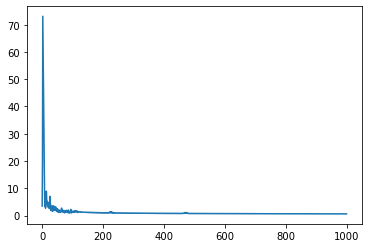

In [15]:
from matplotlib import pyplot as plt

plt.plot(cost)
plt.show()